# Analyse des vols  

On souhaite analyser notre jeu de données pour plusieurs raisons : 
    - Savoir les différentes tendances de réservation sur notre company
    - Identifier les périodes dans lesquelles le taux de réservation augementent
    - Identifier les destination les plus populaires

In [53]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

international_flights = pd.read_csv("international_flights.csv")
domestic_flights = pd.read_csv("domestic_flights.csv")
airoports = pd.read_csv("airports.csv")



On examine la structure des données 

In [3]:
domestic_flights.head()

,Unnamed: 0,origin,destination,depart_time,depart_weekday,duration,arrival_time,arrival_weekday,flight_no,airline_code,airline,economy_fare,business_fare,first_fare
0,0,DEL,BOM,08:00:00,2,02:10:00,10:10:00,2,G8334,G8,Go First,4589,NaN,NaN
1,1,DEL,BOM,10:55:00,2,02:15:00,13:10:00,2,G8338,G8,Go First,4589,NaN,NaN
2,2,DEL,BOM,19:45:00,2,02:15:00,22:00:00,2,G8346,G8,Go First,4589,NaN,NaN
3,3,DEL,BOM,20:50:00,2,02:15:00,23:05:00,2,G8330,G8,Go First,4589,NaN,NaN
4,4,DEL,BOM,07:20:00,5,02:15:00,09:35:00,5,SG8701,SG,SpiceJet,4813,NaN,NaN


In [4]:
airoports

,city,airport,code,country
0,Atlanta,Hartsfield–Jackson Atlanta International Airport,ATL,United States
1,Beijing,Beijing Capital International Airport,PEK,China
2,Dubai,Dubai International Airport,DXB,United Arab Emirates
3,Los Angeles,Los Angeles International Airport,LAX,United States
4,Chicago,O'Hare International Airport,ORD,United States
...,...,...,...,...
122,Mangalore,Mangalore International Airport,IXE,India
123,Port Blair,Vir Savarkar International Airport,IXZ,India
124,Indore,Devi Ahilyabai Holkar Airport,IDR,India
125,Agartala,Agartala Airport,IXA,India


In [5]:
international_flights.head()

,index,origin,destination,depart_time,depart_weekday,duration,arrival_time,arrival_weekday,flight_no,airline_code,airline,economy_fare,business_fare,first_fare
0,0,ATL,LAX,19:05:00,2,01:45:00,20:50:00,2,NK1301,NK,Spirit Airlines,20853,NaN,NaN
1,1,ATL,LAX,19:05:00,1,01:45:00,20:50:00,1,NK1301,NK,Spirit Airlines,23590,NaN,NaN
2,2,ATL,LAX,19:05:00,5,01:45:00,20:50:00,5,NK1301,NK,Spirit Airlines,23590,NaN,NaN
3,3,ATL,LAX,19:05:00,3,01:45:00,20:50:00,3,NK1301,NK,Spirit Airlines,23590,NaN,NaN
4,4,ATL,LAX,10:16:00,4,01:44:00,12:00:00,4,NK1301,NK,Spirit Airlines,32712,NaN,NaN


In [21]:
international_flights.describe()


,index,depart_weekday,arrival_weekday,economy_fare,business_fare,first_fare
count,7120.000000,7120.000000,7120.000000,7.120000e+03,1653.000000,3.155000e+03
mean,3641.621067,3.043118,3.005478,7.749097e+04,145531.876588,3.196053e+05
std,2095.755016,1.978170,1.971663,8.146858e+04,93813.123446,2.329071e+05
min,0.000000,0.000000,0.000000,2.667000e+03,7903.000000,1.541400e+04
25%,1820.750000,1.000000,1.000000,1.975900e+04,50766.000000,1.075310e+05
50%,3657.500000,3.000000,3.000000,4.495750e+04,141078.000000,2.834610e+05
75%,5444.250000,5.000000,5.000000,1.184840e+05,225034.000000,4.812975e+05
max,7273.000000,6.000000,6.000000,1.147860e+06,461913.000000,1.483098e+06


In [22]:
domestic_flights.head()


,Unnamed: 0,origin,destination,depart_time,depart_weekday,duration,arrival_time,arrival_weekday,flight_no,airline_code,airline,economy_fare,business_fare,first_fare
0,0,DEL,BOM,08:00:00,2,02:10:00,10:10:00,2,G8334,G8,Go First,4589,NaN,NaN
1,1,DEL,BOM,10:55:00,2,02:15:00,13:10:00,2,G8338,G8,Go First,4589,NaN,NaN
2,2,DEL,BOM,19:45:00,2,02:15:00,22:00:00,2,G8346,G8,Go First,4589,NaN,NaN
3,3,DEL,BOM,20:50:00,2,02:15:00,23:05:00,2,G8330,G8,Go First,4589,NaN,NaN
4,4,DEL,BOM,07:20:00,5,02:15:00,09:35:00,5,SG8701,SG,SpiceJet,4813,NaN,NaN


In [23]:
airoports.describe()

,city,airport,code,country
count,127,127,127,127
unique,117,127,127,37
top,London,Bagdogra Airport,CDG,India
freq,3,1,1,30


# Préparation des données

- Nous constatons que plusieurs ligne contiennent contiennent des valeurs abérentes (NaN) pour certains colonnes
Nous supprimerons alors ces lignes parce qu'ils ne nous servirons pas trop dans notre étude.


In [6]:
# supprimer les lignes qui ont en moins une valeurs NaN pour dans l'une des colonnes : duration, arrival_time, departure_time
# business_fare, economy_fare, first_fare

columns_treated = ['duration', 'arrival_time', 'depart_time', 'business_fare', 'economy_fare', 'first_fare']

international_flights_cleaned = international_flights.dropna(subset=columns_treated)
domestic_flights_cleaned = domestic_flights.dropna(subset=columns_treated)

In [7]:
# nous pouvons voire à travers le resultat de ce code que le dataset ne contient pas de valeurs "NaN"
for col in international_flights_cleaned.columns:
    # Utiliser la méthode unique() pour obtenir les différentes valeurs dans la colonne
    unique_values = international_flights_cleaned[col].unique()
    #le nombre de valeurs uniques dans la colonne
    number_of_unique_values = international_flights_cleaned[col].nunique()
    
    print("\nValeurs uniques dans la colonne '{}':".format(col))
    print(unique_values)
    
    print("Nombre de valeurs uniques dans la colonne '{}':".format(col), number_of_unique_values)


Valeurs uniques dans la colonne 'index':
[  50   62   88   90   95   97  101  103  105  112  116  122  124  144
  146  151  152  154  156  162  166  359  377  441  442  443  444  445
  446  465  518  520  521  663  674  731  733  745  750  751  753  754
  755  765  767  768  825  826  827  829  834  835  837  838  839  841
  845  847  848  999 1000 1011 1084 1099 1103 1105 1107 1108 1110 1117
 1118 1133 1146 1174 1175 1178 1179 1180 1181 1183 1191 1282 1283 1284
 1285 1288 1292 1295 1298 1299 1301 1306 1335 1345 1346 1347 1348 1350
 1351 1382 1406 1410 1413 1420 1421 1422 1429 1431 1432 1434 1553 1555
 1559 1560 1561 1569 1577 1584 1586 1587 1588 1590 1599 1600 1611 1615
 1650 1651 1653 1654 1691 1697 1707 1708 1709 1710 1711 1712 1714 1715
 1716 1717 1718 1719 1720 1722 1724 1725 1731 1734 1736 1737 1740 1742
 1744 1745 1746 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1768
 1770 1772 1773 1777 1778 1781 1782 1786 1803 1808 1811 1812 1820 1821
 1829 1833 1834 1835 1838 1842 1864

# Exploration des données 

On souhaite afficher la repartition des vols réservés depuis la société "YouHassAir" dans la semaine. Cela permettera de prendre une idée sur les jours qui connaissent plus de voyages

Créant un nuage de points pour les jours de départs : 

In [10]:
x = [i for i in range(7)]
y_international = [(international_flights_cleaned['depart_weekday']==i).sum() for i in range(7)]
y_domestic = [(domestic_flights_cleaned['depart_weekday']==i).sum() for i in range(7)]

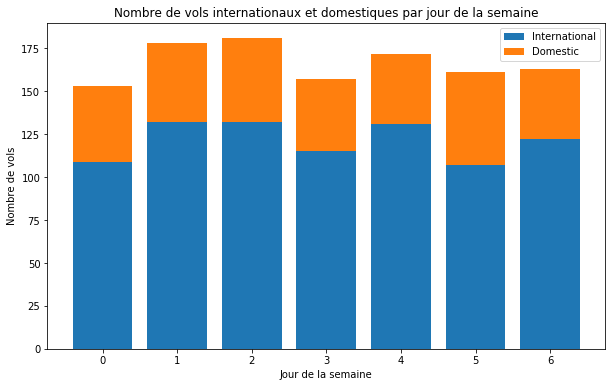

In [12]:
# Création du diagramme en barres
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y_international, label='International')
ax.bar(x, y_domestic, bottom=y_international, label='Domestic')
ax.set_xlabel('Jour de la semaine')
ax.set_ylabel('Nombre de vols')
ax.set_title('Nombre de vols internationaux et domestiques par jour de la semaine')
ax.legend()

# Affichage du diagramme
plt.show()


On constate qu'en mercredi il y a plusieurs plusieurs voyages domestique et internationaux.

In [40]:
x_companies = international_flights_cleaned['airline'].unique()
y_international_companies = [(international_flights_cleaned['airline']==i).sum() for i in list(x_companies)]
y_domestic_companies = [(domestic_flights_cleaned['airline']==i).sum() for i in list(x_companies)]

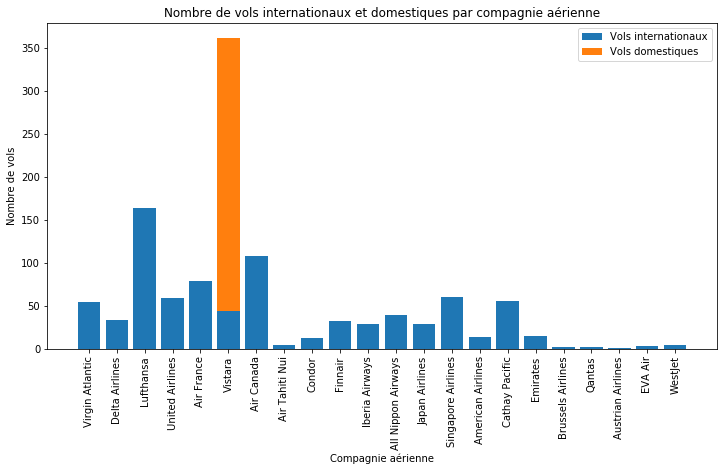

In [44]:
# Création du diagramme en barres
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x_companies, y_international_companies, label='Vols internationaux')
ax.bar(x_companies, y_domestic_companies, bottom=y_international_companies, label='Vols domestiques')
ax.set_xlabel('Compagnie aérienne')
ax.set_ylabel('Nombre de vols')
ax.set_title('Nombre de vols internationaux et domestiques par compagnie aérienne')
ax.legend()

# Affichage du diagramme
plt.xticks(rotation=90)
plt.show()

# Regression linéaire

In [63]:
df = pd.DataFrame({'weekday': x, 'number_flights': y_international})
df

,weekday,number_flights
0,0,109
1,1,132
2,2,132
3,3,115
4,4,131
5,5,107
6,6,122


In [67]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Diviser les données en données d'entraînement et de test
X = df[['weekday']]  # Variable indépendante (jour de la semaine)
y = df['number_flights']  # Variable dépendante (nombre de vols)

# Créer et entraîner le modèle de régression linéaire
regression = LinearRegression()
regression.fit(X, y)

# Faire des prédictions pour tous les jours de la semaine (0 à 6)
predictions = regression.predict(X)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y, predictions, squared=False)

# Afficher les prédictions et RMSE
print("Prédictions : ", predictions)
print("RMSE : ", rmse)


Prédictions :  [122.42857143 122.         121.57142857 121.14285714 120.71428571
 120.28571429 119.85714286]
RMSE :  10.097484026898453


# Regression ridge

In [70]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



# Diviser les données en données d'entraînement et de test
X = df[['weekday']]  # Variable indépendante (jour de la semaine)
y = df['number_flights']  # Variable dépendante (nombre de vols)

# Créer et entraîner le modèle de régression Ridge
ridge = Ridge(alpha=1.0)  # Paramètre alpha pour la régularisation
ridge.fit(X, y)

# Faire des prédictions pour tous les jours de la semaine (0 à 6)
predictions = ridge.predict(X)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y, predictions, squared=False)

# Afficher les prédictions et RMSE
print("Prédictions : ", predictions)
print("RMSE : ", rmse)

Prédictions :  [122.38423645 121.97044335 121.55665025 121.14285714 120.72906404
 120.31527094 119.90147783]
RMSE :  10.097527284887285


# Decision tree 

In [74]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Diviser les données en données d'entraînement et de test
X = df[['weekday']]  # Variable indépendante (jour de la semaine)
y = df['number_flights']  # Variable dépendante (nombre de vols)

# Créer et entraîner le modèle d'arbre de décision
tree = DecisionTreeRegressor(max_depth=3)  # Profondeur maximale de l'arbre
tree.fit(X, y)

# Faire des prédictions pour tous les jours de la semaine (0 à 6)
predictions = tree.predict(X)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y, predictions, squared=False)

# Afficher les prédictions et RMSE
print("Prédictions : ", predictions)
print("RMSE : ", rmse)

Prédictions :  [109.  132.  132.  123.  123.  114.5 114.5]
RMSE :  5.861496639693898


# Random forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = df[['weekday']]  # Variable indépendante (jour de la semaine)
y = df['number_flights']  # Variable dépendante (nombre de vols)

# Créer et entraîner le modèle Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

# Faire des prédictions pour tous les jours de la semaine (0 à 6)
predictions = rf.predict(X)

# Calculer la racine carrée de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y, predictions, squared=False)

# Afficher les prédictions et RMSE
print("Prédictions : ", predictions)
print("RMSE : ", rmse)

Prédictions :  [117.57 126.54 130.41 119.49 124.76 114.83 119.06]
RMSE :  5.792048736969375
